In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

# 1.创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]

data = pd.Series(data)
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1901','1990'))
data.plot(figsize=(12,8))
#绘制时序的数据图
plt.show()

#2.下面我们先对非平稳时间序列进行时间序列的差分，找出适合的差分次数d的值：
#fig = plt.figure(figsize=(12, 8))
#ax1 = fig.add_subplot(111)
#diff1 = data.diff(1)
#diff1.plot(ax=ax1)
#这里是做了1阶差分，可以看出时间序列的均值和方差基本平稳，不过还是可以比较一下二阶差分的效果：

#这里进行二阶差分
#fig = plt.figure(figsize=(12, 8))
#ax2 = fig.add_subplot(111)
#diff2 = data.diff(2)
#diff2.plot(ax=ax2)
#由下图可以看出来一阶跟二阶的差分差别不是很大，所以可以把差分次数d设置为1，上面的一阶和二阶程序我们注释掉

#这里我们使用一阶差分的时间序列
#3.接下来我们要找到ARIMA模型中合适的p和q值：


<Figure size 1200x800 with 1 Axes>

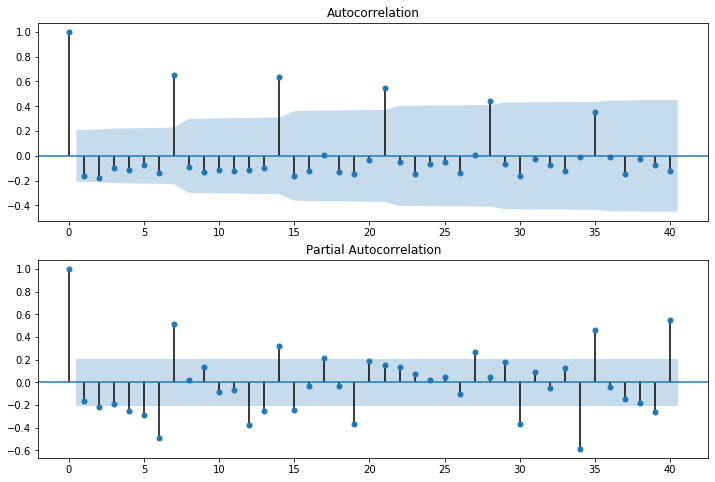

In [3]:
data1 = data.diff(1)
data1.dropna(inplace=True)
#加上这一步，不然后面画出的acf和pacf图会是一条直线

#第一步：先检查平稳序列的自相关图和偏自相关图
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1,lags=40,ax=ax1)
#lags 表示滞后的阶数
#第二步：下面分别得到acf 图和pacf 图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1, lags=40,ax=ax2)

In [4]:
#由上图可知，我们可以分别用ARMA(7,0)模型、ARMA(7,1)模型、ARMA(8,0)模型等来拟合找出最佳模型：
#第三步:找出最佳模型ARMA
arma_mod1 = sm.tsa.ARMA(data1,(7,0)).fit()
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
arma_mod2 = sm.tsa.ARMA(data1,(7,1)).fit()
print(arma_mod2.aic, arma_mod2.bic, arma_mod2.hqic)
arma_mod3 = sm.tsa.ARMA(data1,(8,0)).fit()
print(arma_mod3.aic, arma_mod3.bic, arma_mod3.hqic)

#由上面可以看出ARMA(7,0)模型最佳
#第四步：进行模型检验
#首先对ARMA(7,0)模型所产生的残差做自相关图

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1580.3025343748373 1602.7002617024266 1589.3304155068945


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.741953806992 1606.6283175043134 1591.7729328426112


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1582.0274262669918 1606.9137899643133 1592.0584053026112


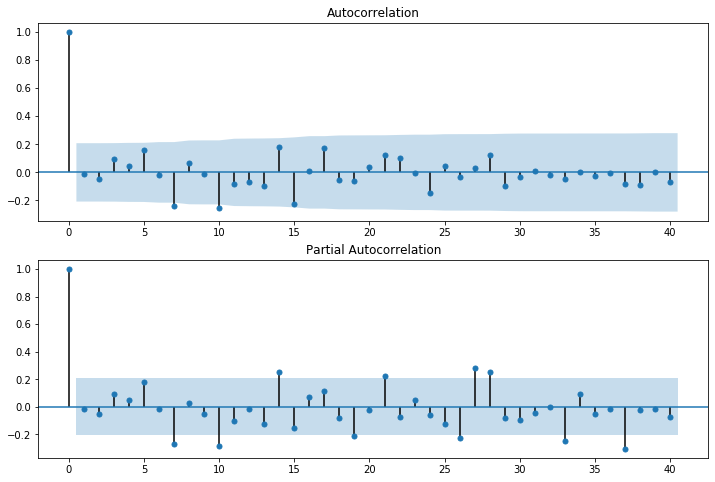

In [5]:
resid = arma_mod1.resid
#一定要加上这个变量赋值语句，不然会报错resid is not defined 
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

2.0226632651309573
            AC          Q  Prob(>Q)
lag                                
1.0  -0.013620   0.017072  0.896044
2.0  -0.048110   0.232543  0.890233
3.0   0.094048   1.065524  0.785403
4.0   0.047719   1.282489  0.864339
5.0   0.157829   3.684234  0.595712
6.0  -0.015497   3.707668  0.716166
7.0  -0.241722   9.478640  0.220093
8.0   0.067334   9.931967  0.269833
9.0  -0.015059   9.954925  0.354147
10.0 -0.250211  16.373165  0.089437
11.0 -0.085557  17.133230  0.103996
12.0 -0.066883  17.603737  0.128263
13.0 -0.099118  18.650680  0.134339
14.0  0.183460  22.285243  0.072940
15.0 -0.224821  27.817113  0.022742
16.0  0.013207  27.836466  0.033071
17.0  0.172933  31.200445  0.018880
18.0 -0.054509  31.539375  0.024913
19.0 -0.059218  31.945106  0.031702
20.0  0.038318  32.117448  0.042063
21.0  0.122530  33.905623  0.037091
22.0  0.105273  35.245271  0.036518
23.0 -0.007280  35.251775  0.049096
24.0 -0.147064  37.946585  0.035112
25.0  0.045061  38.203536  0.044188
26.0 -0.0

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


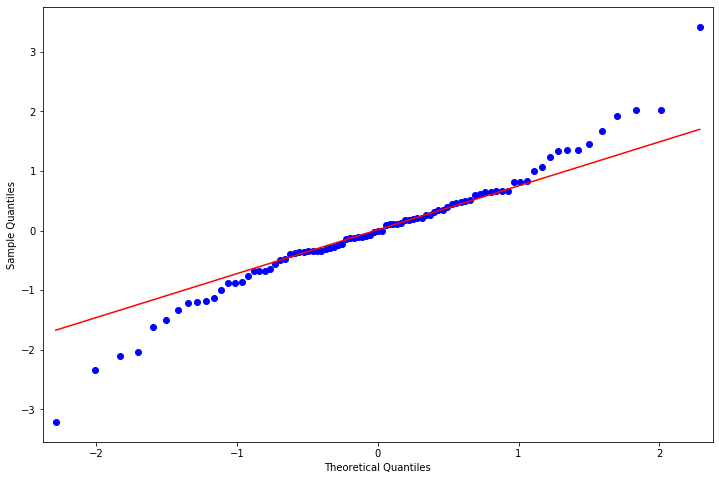

In [6]:
#接着做德宾-沃森（D-W）检验
print(sm.stats.durbin_watson(arma_mod1.resid.values))
#得出来结果是不存在自相关性的

#再观察是否符合正态分布,这里用qq图
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q',ax=ax, fit=True)

#最后用Ljung-Box检验:检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），
#如果检验概率小于给定的显著性水平，比如0.05、0.10等就拒绝原假设，其原假设是相关系数为零。
#就结果来看，前12阶的P值都是大于0.05，所以在0.05的显著性水平下，不拒绝原假设，即残差为白噪声序列。
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data2 = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data2, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

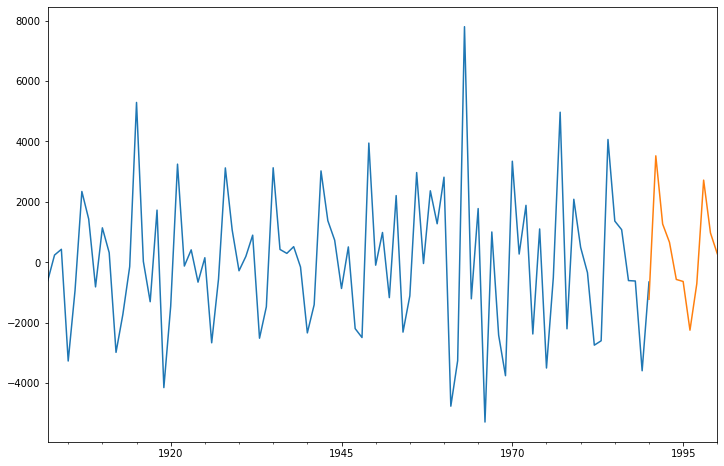

In [7]:
#第五步：平稳模型预测,对未来十年进行预测
predict_y =arma_mod1.predict('1990', '2000', dynamic=True)
#print(predict_y)
fig, ax = plt.subplots(figsize=(12,8))
ax = data1.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)

In [8]:
#还原到原始序列
ts_restored = pd.Series([data[0]], index=[data.index[0]]) .append(data1).cumsum()

In [9]:
print(ts_restored)

1901-12-31     5922.0
1902-12-31     5308.0
1903-12-31     5546.0
1904-12-31     5975.0
1905-12-31     2704.0
1906-12-31     1767.0
1907-12-31     4111.0
1908-12-31     5542.0
1909-12-31     4726.0
1910-12-31     5866.0
1911-12-31     6183.0
1912-12-31     3199.0
1913-12-31     1471.0
1914-12-31     1325.0
1915-12-31     6618.0
1916-12-31     6644.0
1917-12-31     5337.0
1918-12-31     7064.0
1919-12-31     2912.0
1920-12-31     1456.0
1921-12-31     4705.0
1922-12-31     4579.0
1923-12-31     4990.0
1924-12-31     4331.0
1925-12-31     4481.0
1926-12-31     1813.0
1927-12-31     1258.0
1928-12-31     4383.0
1929-12-31     5451.0
1930-12-31     5169.0
               ...   
1961-12-31     9873.0
1962-12-31     6613.0
1963-12-31    14415.0
1964-12-31    13204.0
1965-12-31    14982.0
1966-12-31     9690.0
1967-12-31    10693.0
1968-12-31     8276.0
1969-12-31     4519.0
1970-12-31     7865.0
1971-12-31     8137.0
1972-12-31    10022.0
1973-12-31     7646.0
1974-12-31     8749.0
1975-12-31